In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Pervasive Project/rice_leaf_diseases'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/rice-leaf-diseases/rice_leaf_diseases/Brown spot/DSC_0305.JPG
/kaggle/input/rice-leaf-diseases/rice_leaf_diseases/Brown spot/DSC_0394.jpg
/kaggle/input/rice-leaf-diseases/rice_leaf_diseases/Brown spot/DSC_0105.jpg
/kaggle/input/rice-leaf-diseases/rice_leaf_diseases/Brown spot/DSC_0104.jpg
/kaggle/input/rice-leaf-diseases/rice_leaf_diseases/Brown spot/DSC_0325.JPG
/kaggle/input/rice-leaf-diseases/rice_leaf_diseases/Brown spot/DSC_0332.JPG
/kaggle/input/rice-leaf-diseases/rice_leaf_diseases/Brown spot/DSC_0296.jpg
/kaggle/input/rice-leaf-diseases/rice_leaf_diseases/Brown spot/DSC_0114.jpg
/kaggle/input/rice-leaf-diseases/rice_leaf_diseases/Brown spot/DSC_0329.jpg
/kaggle/input/rice-leaf-diseases/rice_leaf_diseases/Brown spot/DSC_0100.jpg
/kaggle/input/rice-leaf-diseases/rice_leaf_diseases/Brown spot/DSC_0299.JPG
/kaggle/input/rice-leaf-diseases/rice_leaf_diseases/Brown spot/DSC_0307.JPG
/kaggle/input/rice-leaf-diseases/rice_leaf_diseases/Brown spot/DSC_0301.JPG
/kaggle/inpu

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
data_dir = '../content/drive/MyDrive/Pervasive Project/rice_leaf_diseases'

In [4]:
data_dir

'../input/rice-leaf-diseases/rice_leaf_diseases'

In [5]:
import pathlib
data_dir=pathlib.Path(data_dir)
data_dir

PosixPath('../input/rice-leaf-diseases/rice_leaf_diseases')

In [6]:
list(data_dir.glob("*DSC*.jpg"))

[]

In [7]:
bacteria=list(data_dir.glob("Bacterial leaf blight/*"))
len(bacteria)

40

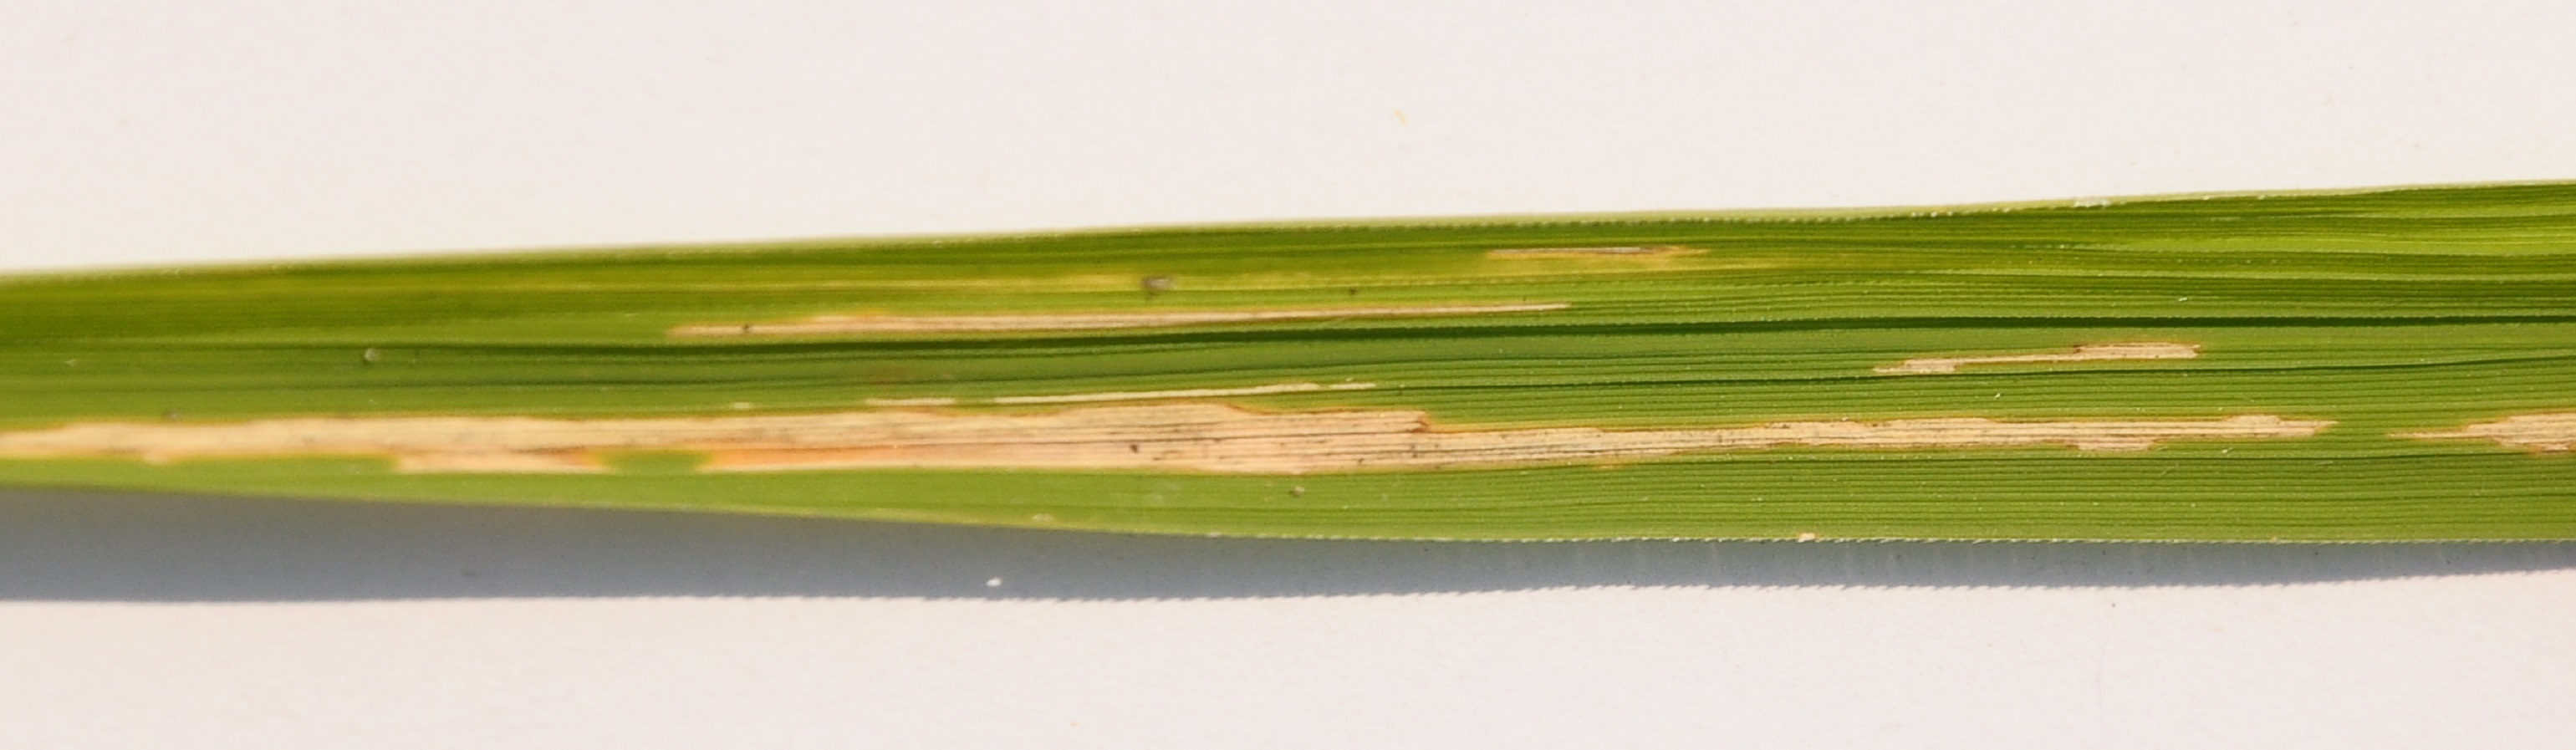

In [8]:
PIL.Image.open(str(bacteria[0]))

In [9]:
brown=list(data_dir.glob("Brown spot/*"))
len(brown)

40

In [10]:
dict={"bacteria":list(data_dir.glob("Bacterial leaf blight/*")),"brown":list(data_dir.glob("Brown spot/*")),"smut":list(data_dir.glob("Leaf smut/*"))}

In [11]:
labels_dict = {
    'bacteria': 0,
    'brown': 1,
    'smut': 2,
   
}

In [12]:
str(dict["smut"][0])

'../input/rice-leaf-diseases/rice_leaf_diseases/Leaf smut/DSC_0330.jpg'

In [13]:
img=cv2.imread(str((dict["smut"][0])))
               


In [14]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [15]:
X, y = [], []

for name, images in dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(labels_dict[name])

In [16]:
y[:5]

[0, 0, 0, 0, 0]

In [17]:
X = np.array(X)
y = np.array(y)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


In [19]:
len(X_test)

30

In [20]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [21]:
num_classes = 3
model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)

2022-07-20 12:54:07.314988: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-07-20 12:54:07.501230: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30
3/3 [==============================] - 2s 216ms/step - loss: 2.9700 - accuracy: 0.2222
Epoch 2/30
3/3 [==============================] - 1s 209ms/step - loss: 1.1739 - accuracy: 0.3444
Epoch 3/30
3/3 [==============================] - 1s 209ms/step - loss: 1.0568 - accuracy: 0.4444
Epoch 4/30
3/3 [==============================] - 1s 210ms/step - loss: 0.9969 - accuracy: 0.5000
Epoch 5/30
3/3 [==============================] - 1s 206ms/step - loss: 0.9358 - accuracy: 0.5556
Epoch 6/30
3/3 [==============================] - 1s 213ms/step - loss: 0.8445 - accuracy: 0.6222
Epoch 7/30
3/3 [==============================] - 1s 209ms/step - loss: 0.7601 - accuracy: 0.6778
Epoch 8/30
3/3 [==============================] - 1s 205ms/step - loss: 0.6294 - accuracy: 0.7333
Epoch 9/30
3/3 [==============================] - 1s 211ms/step - loss: 0.6231 - accuracy: 0.7444
Epoch 10/30
3/3 [==============================] - 1s 205ms/step - loss: 0.5211 - accuracy: 0.7667
Epoch 11/30
3/3 [==

In [22]:
model.evaluate(X_test_scaled,y_test)

1/1 [==============================] - 0s 440ms/step - loss: 1.2814 - accuracy: 0.7333


[1.2813880443572998, 0.7333333492279053]

In [23]:
predictions = model.predict(X_test_scaled)
predictions

array([[ -7.205966  ,  -3.2095816 ,   5.727041  ],
       [ -6.147265  ,  -2.5293715 ,   3.6129239 ],
       [ -8.128728  ,   3.662287  ,   0.9801095 ],
       [  2.7402864 ,   0.39626116,  -9.937942  ],
       [ -6.170326  ,  -2.1726713 ,   2.6471598 ],
       [  1.5785708 ,  -1.9809761 ,  -6.128241  ],
       [  4.975891  ,  -6.033901  ,  -7.0037236 ],
       [ -0.75163573,  -1.546676  ,  -3.4575937 ],
       [ -4.5387244 ,  -2.241513  ,   1.8174335 ],
       [  0.93340003,  -1.5389484 ,  -5.246876  ],
       [  0.49606195,  -3.9284565 ,  -2.9693835 ],
       [ -4.1779265 ,  -0.23696443,  -0.48730716],
       [ -0.792324  ,  -4.030112  ,  -1.3658699 ],
       [ -3.74186   ,  -4.216737  ,   2.554485  ],
       [ -6.647705  ,  -3.7994134 ,   5.7858486 ],
       [ -5.521076  ,   4.051774  ,  -4.208002  ],
       [  2.19541   ,  -0.09662826,  -8.916139  ],
       [ -7.6997957 ,   7.267993  ,  -3.054003  ],
       [ -5.9997606 ,  -4.2019176 ,   3.3327382 ],
       [-10.857415  ,   6.49821

In [24]:
score = tf.nn.softmax(predictions[0])

In [25]:
np.argmax(score)

2

In [26]:
y_test[0]

1

In [27]:
data_augmentation = keras.Sequential(
  [

    layers.experimental.preprocessing.RandomZoom(0.2),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomFlip("horizontal")
  ]
)

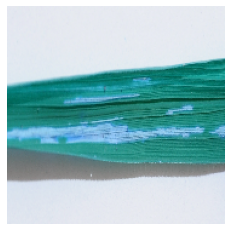

In [28]:
plt.axis('off')
plt.imshow(X[0])


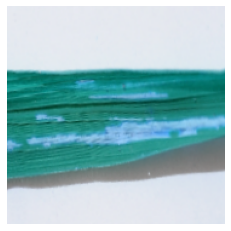

In [29]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [30]:
num_classes = 3

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.1),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=40)    

Epoch 1/40
3/3 [==============================] - 2s 292ms/step - loss: 1.8338 - accuracy: 0.3333
Epoch 2/40
3/3 [==============================] - 1s 286ms/step - loss: 1.1060 - accuracy: 0.3333
Epoch 3/40
3/3 [==============================] - 1s 280ms/step - loss: 1.0951 - accuracy: 0.3556
Epoch 4/40
3/3 [==============================] - 1s 284ms/step - loss: 1.0478 - accuracy: 0.4444
Epoch 5/40
3/3 [==============================] - 1s 288ms/step - loss: 0.9941 - accuracy: 0.5111
Epoch 6/40
3/3 [==============================] - 1s 280ms/step - loss: 1.0146 - accuracy: 0.3889
Epoch 7/40
3/3 [==============================] - 1s 287ms/step - loss: 0.9618 - accuracy: 0.5556
Epoch 8/40
3/3 [==============================] - 1s 285ms/step - loss: 0.9347 - accuracy: 0.6222
Epoch 9/40
3/3 [==============================] - 1s 309ms/step - loss: 0.8518 - accuracy: 0.7222
Epoch 10/40
3/3 [==============================] - 1s 279ms/step - loss: 0.7859 - accuracy: 0.6667
Epoch 11/40
3/3 [==

In [31]:
model.evaluate(X_test_scaled,y_test)

1/1 [==============================] - 0s 249ms/step - loss: 0.7295 - accuracy: 0.7333


[0.7295058965682983, 0.7333333492279053]